In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

Here I will be trying to predict TOC, so it's the output feature

In [ ]:
from google.colab import files
files.upload()

Saving Chapter5_TOC_Prediction_DataSet.xlsx to Chapter5_TOC_Prediction_DataSet.xlsx


{'Chapter5_TOC_Prediction_DataSet.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [ ]:
df=pd.read_excel('Chapter5_TOC_Prediction_DataSet.xlsx')
df.describe().T

count        mean        std        min  \
Thickness_ft                 987.0  150.448933  52.452284  50.218753   
Bulk Density_gg per cc       987.0    2.423001   0.019059   2.386117   
Resistivity_ohmsm            987.0    3.892432   1.342193   1.680451   
Effective Porosity_Fraction  987.0    0.061492   0.014805   0.017432   
Clay Volume_ Fraction        987.0    0.271257   0.045289   0.153118   
Water Saturation_Fraction    987.0    0.435876   0.080023   0.230041   
TOC_Fraction                 987.0    0.052630   0.005062   0.030830   

                                    25%         50%         75%         max  
Thickness_ft                 123.462354  141.662622  166.707110  475.992627  
Bulk Density_gg per cc         2.409469    2.422639    2.433418    2.540608  
Resistivity_ohmsm              3.120852    3.650354    4.319585   15.970625  
Effective Porosity_Fraction    0.051250    0.061158    0.072289    0.096054  
Clay Volume_ Fraction          0.238607    0.264785    0.303776    0.413083  
Water Saturation_Fraction      0.372234    0.442414    0.490972    0.683304  
TOC_Fraction                   0.051026    0.053662    0.056100    0.060907

In [ ]:
df.head(3)

Thickness_ft  Bulk Density_gg per cc  Resistivity_ohmsm  \
0    219.713745                2.415151           3.151841   
1    160.308606                2.430899           3.160330   
2    149.944934                2.424665           4.087933   

   Effective Porosity_Fraction  Clay Volume_ Fraction  \
0                     0.066973               0.228949   
1                     0.034790               0.297078   
2                     0.062167               0.311720   

   Water Saturation_Fraction  TOC_Fraction  
0                   0.466486      0.057828  
1                   0.544329      0.051316  
2                   0.426713      0.055788

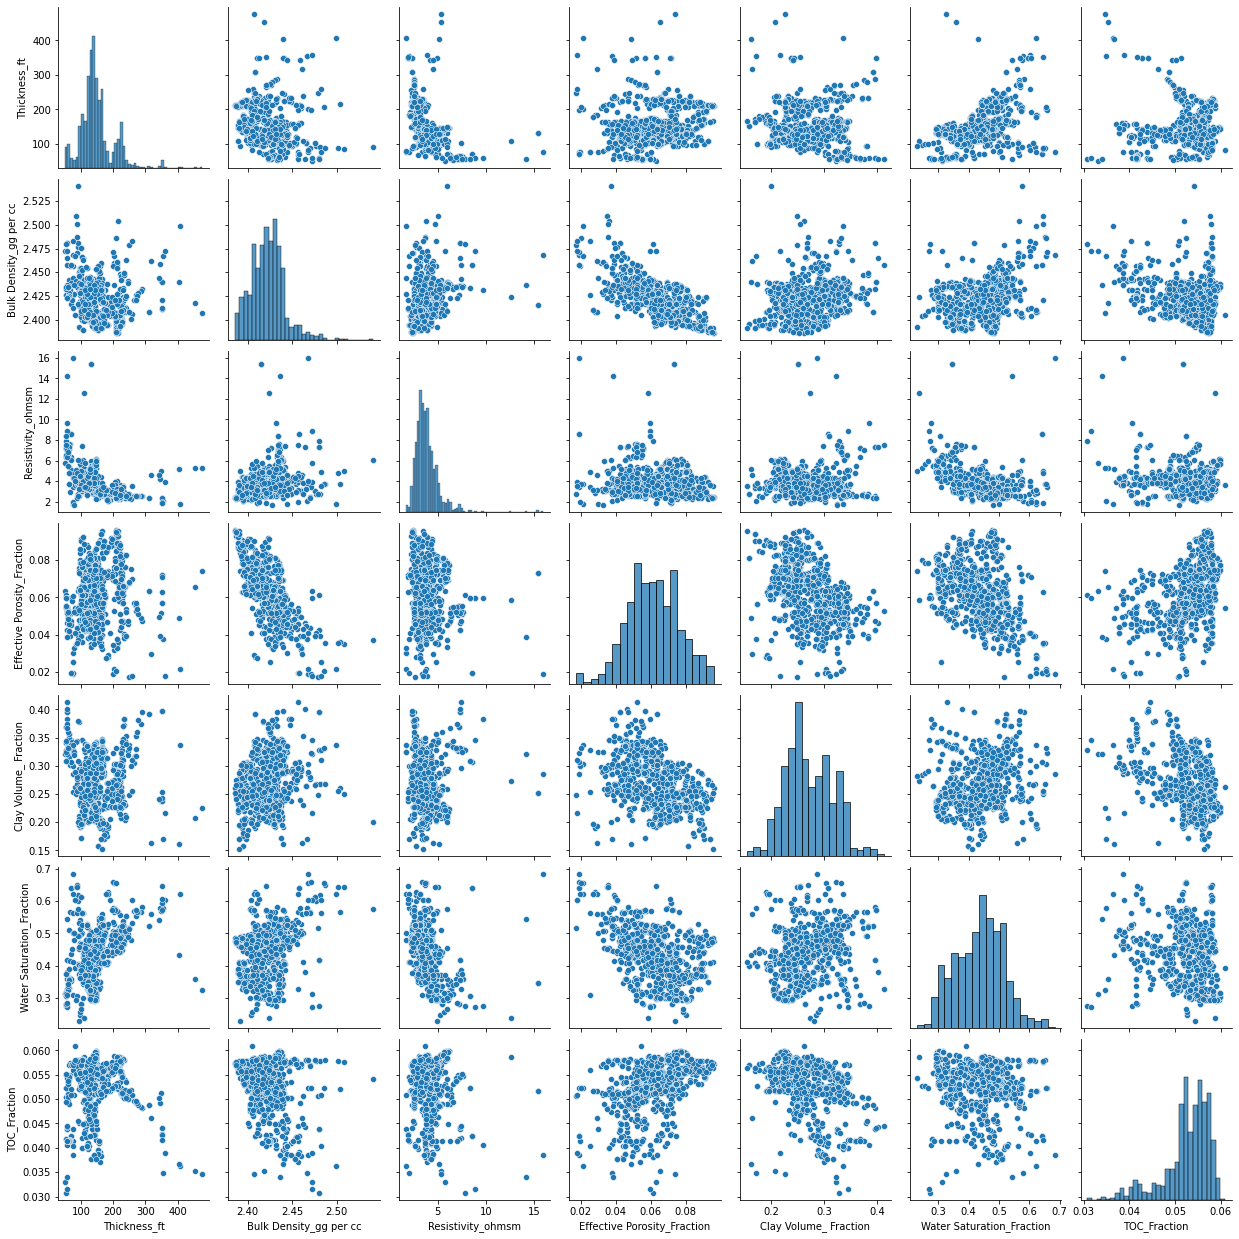

In [ ]:
sns.pairplot(df)

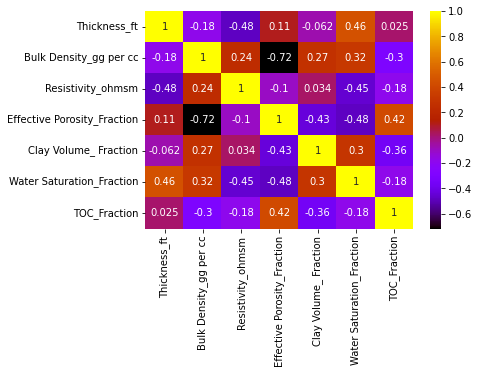

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='gnuplot')
#here bulk density and effective porosity have a correlation
#we can drop one of them or keep it as long as the testing accuracy does not decrease

In [ ]:
x=df.drop(['TOC_Fraction'], axis=1)
y=df['TOC_Fraction']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=1000)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=4, 
                            min_samples_leaf=2,max_features=None, ccp_alpha=0, random_state=1000)

In [ ]:
dtree.fit(x_train,y_train)

y_pred_train=dtree.predict(x_train)
y_pred_test=dtree.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [ ]:
from sklearn.metrics import r2_score
print('testing score:', r2_score(y_test, y_pred_test))
print('training score:', r2_score(y_train, y_pred_train))
#this shows that we had some overfitting
#we can change manually the hyperparameters
#or use the grid search optimization


testing score: 0.6252317725542857
training score: 0.9757921671724374


Grid search is essentially an optimization algorithm which lets you select the best parameters for your optimization problem from a list of parameter options that you provide, hence automating the 'trial-and-error' method

In [ ]:
#let us change them manually to see how these hyperparameters work
dtree=DecisionTreeRegressor(criterion='mae', splitter='best', max_depth=None, min_samples_split=4, 
                            min_samples_leaf=2,max_features=None, ccp_alpha=0, random_state=1000)
dtree.fit(x_train,y_train)

y_pred_train=dtree.predict(x_train)
y_pred_test=dtree.predict(x_test)

print('testing score:', r2_score(y_test, y_pred_test))
print('training score:', r2_score(y_train, y_pred_train))

testing score: 0.5399806468909734
training score: 0.9557749886694112


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


In [ ]:
dtree=DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=4, 
                            min_samples_leaf=2,max_features=3, ccp_alpha=0, random_state=1000)
dtree.fit(x_train,y_train)

y_pred_train=dtree.predict(x_train)
y_pred_test=dtree.predict(x_test)

print('testing score:', r2_score(y_test, y_pred_test))
print('training score:', r2_score(y_train, y_pred_train))

testing score: 0.7551983267019594
training score: 0.963368208846603


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [ ]:
dtree=DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=4, 
                            min_samples_leaf=2,max_features=3, ccp_alpha=0, random_state=1000)
dtree.fit(x_train,y_train)

y_pred_train=dtree.predict(x_train)
y_pred_test=dtree.predict(x_test)

print('testing score:', r2_score(y_test, y_pred_test))
print('training score:', r2_score(y_train, y_pred_train))
#this was the best one 
#just a hint: max_features is the nb of feature we have in the dataset after splitting
#so here, max_features=6 is the max, if 7 and above then error

testing score: 0.7551983267019594
training score: 0.963368208846603


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Text(0.5, 1.0, 'TOC Training Data')

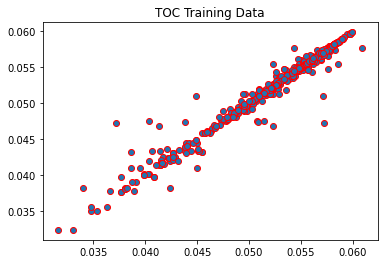

In [ ]:
plt.scatter(y_train, y_pred_train, linewidths=1, edgecolor='red')
plt.title('TOC Training Data')

Text(0.5, 1.0, 'TOC Testing Data')

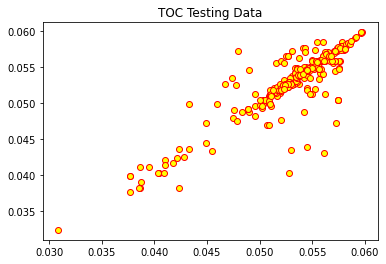

In [ ]:
plt.scatter(y_test, y_pred_test,color='yellow' ,linewidths=1, edgecolor='red')
plt.title('TOC Testing Data')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test,y_pred_test))
print(mean_squared_error(y_test,y_pred_test))

0.001104678107744107
5.1610344289314755e-06


In [ ]:
#make same for trained ones 

In [ ]:
dtree.feature_importances_

array([0.23911175, 0.18380079, 0.1384277 , 0.21857979, 0.15522696,
       0.064853  ])

In [ ]:
dt=df.columns[:-1]


In [ ]:
dt=pd.DataFrame(dtree.feature_importances_, index=dt)

In [ ]:
dt

0
Thickness_ft                 0.239112
Bulk Density_gg per cc       0.183801
Resistivity_ohmsm            0.138428
Effective Porosity_Fraction  0.218580
Clay Volume_ Fraction        0.155227
Water Saturation_Fraction    0.064853

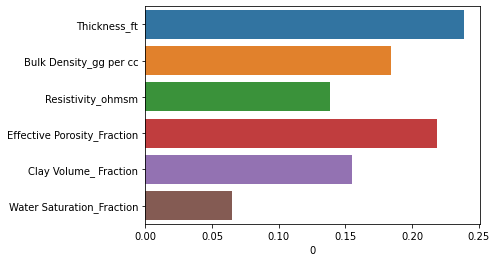

In [ ]:
sns.barplot(x=dt[0], y=dt.index)

In [ ]:
from sklearn.model_selection import cross_val_score
np.random.seed(1000)
scores=cross_val_score(dtree, x,y,cv=5,scoring='r2')

print(scores)

[0.76643234 0.53734489 0.46440422 0.6039388  0.67533666]


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

In [ ]:
print(scores.mean()) #average cross validation

0.6094913833589305


In [ ]:
from sklearn import tree
plt.figure(figsize=(400,240))
tree.plot_tree(dtree,feature_names=df.columns,filled=True)

[Text(0.6176204345088161, 0.9722222222222222, 'Effective Porosity_Fraction <= 0.057\nmse = 0.0\nsamples = 690\nvalue = 0.052'),
 Text(0.3605885285474391, 0.9166666666666666, 'Thickness_ft <= 349.382\nmse = 0.0\nsamples = 291\nvalue = 0.05'),
 Text(0.3055599286314022, 0.8611111111111112, 'Clay Volume_ Fraction <= 0.344\nmse = 0.0\nsamples = 285\nvalue = 0.05'),
 Text(0.22237090680100755, 0.8055555555555556, 'Resistivity_ohmsm <= 4.133\nmse = 0.0\nsamples = 258\nvalue = 0.051'),
 Text(0.13507556675062973, 0.75, 'Bulk Density_gg per cc <= 2.449\nmse = 0.0\nsamples = 171\nvalue = 0.052'),
 Text(0.0644416456759026, 0.6944444444444444, 'Resistivity_ohmsm <= 2.992\nmse = 0.0\nsamples = 145\nvalue = 0.052'),
 Text(0.01595298068849706, 0.6388888888888888, 'Thickness_ft <= 137.261\nmse = 0.0\nsamples = 20\nvalue = 0.049'),
 Text(0.006717044500419815, 0.5833333333333334, 'Effective Porosity_Fraction <= 0.039\nmse = 0.0\nsamples = 5\nvalue = 0.043'),
 Text(0.0033585222502099076, 0.5277777777777778